# 1. Análisis Descriptivo de los Datos
En esta sección, realizaremos un análisis descriptivo para entender mejor las características del conjunto de datos.

In [7]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo de datos desde mi directorio
file_path = r'C:\Users\Howard\Desktop\bike_sharing_data.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas del conjunto de datos
print(data.head())

# Resumen estadístico de las variables numéricas
print(data.describe())

# Información sobre el tipo de datos y valores nulos
print(data.info())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
          instant      sea

In [8]:
# Resumen estadístico de todas las columnas numéricas
data_description = data.describe()
print(data_description)

# Distribución de valores para cada variable categórica
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_columns:
    print(f"Distribución de {col}:\n{data[col].value_counts()}\n")

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

# 2. Determinación del Conjunto de Modelización y Validación
Dividimos los datos en conjuntos de entrenamiento y validación para la construcción y evaluación de modelos.

In [9]:
from sklearn.model_selection import train_test_split

# División del conjunto de datos (80% entrenamiento, 20% validación)
train_data, validation_data = train_test_split(data, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos de datos
print(f'Tamaño del conjunto de entrenamiento: {train_data.shape}')
print(f'Tamaño del conjunto de validación: {validation_data.shape}')

Tamaño del conjunto de entrenamiento: (584, 16)
Tamaño del conjunto de validación: (147, 16)


# 3. Tratamiento de Valores Faltantes (Missing Values)
Verificamos si existen valores faltantes y los tratamos adecuadamente.

In [11]:
# Verificar si hay valores faltantes
missing_values = data.isnull().sum()
print("Valores faltantes en cada columna:\n", missing_values)

# En este caso, se asume que no hay valores faltantes significativos. Si hubiera, podríamos usar técnicas como:
# data.fillna(data.mean())  # Para imputación de valores faltantes numéricos
# data.dropna()  # Para eliminar filas con valores faltantes

Valores faltantes en cada columna:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


# 4. Análisis de Correlación
Visualizamos la matriz de correlación para identificar relaciones entre variables.

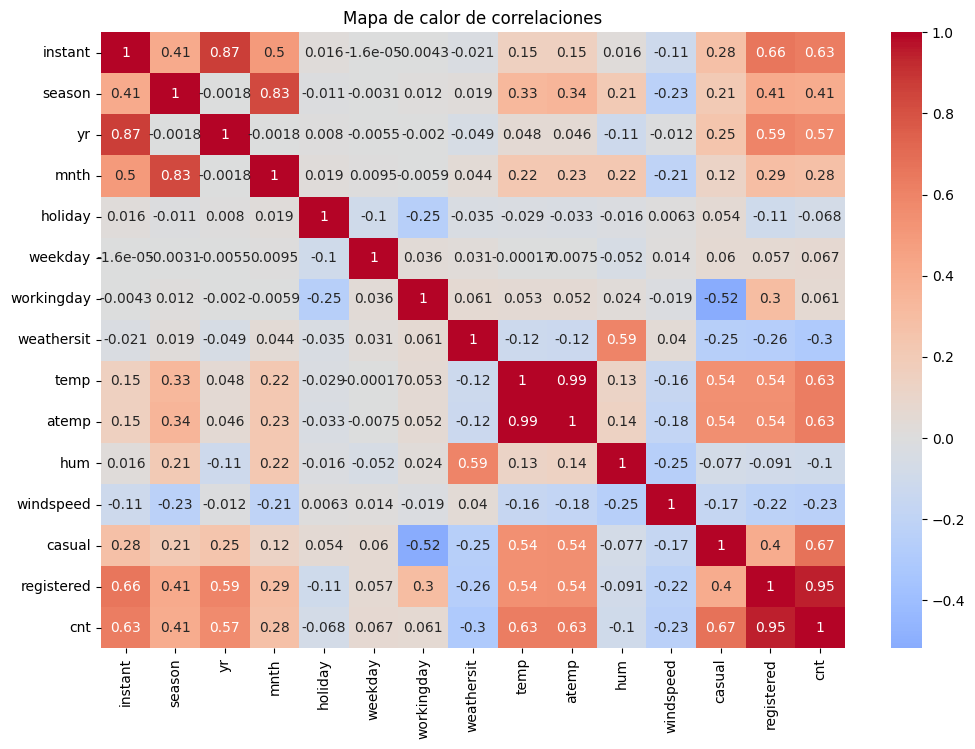

In [15]:
# Seleccionar solo las columnas numéricas para la matriz de correlación
numerical_columns = data.select_dtypes(include=[np.number]).columns
corr_matrix = data[numerical_columns].corr()

# Mapa de calor de correlaciones con columnas numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de calor de correlaciones')
plt.show()

# 5. Distribuciones de las Variables
Visualizamos las distribuciones de las variables relevantes, especialmente la variable respuesta cnt.

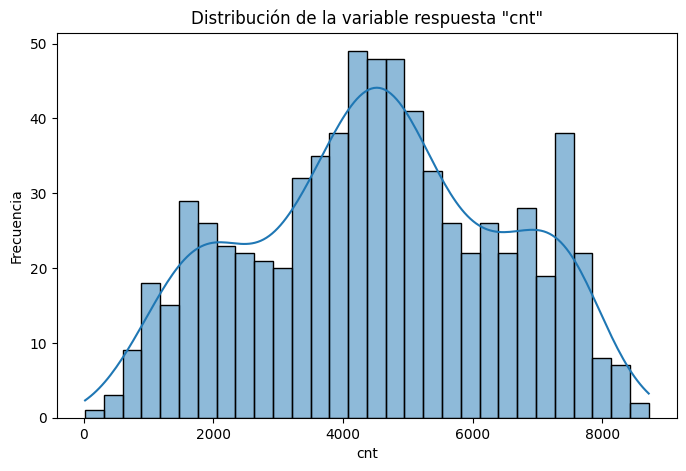

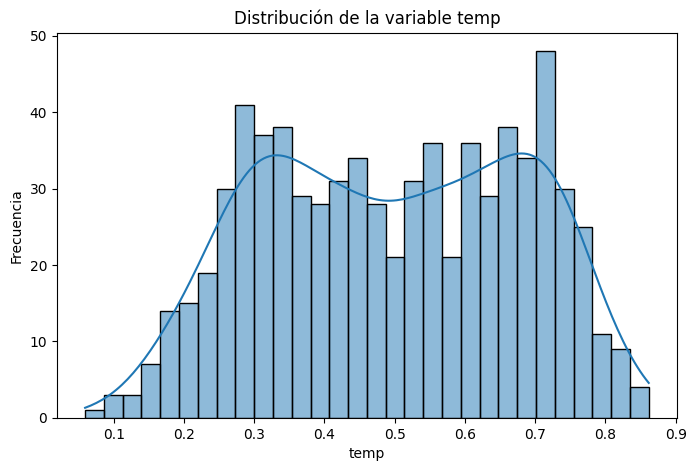

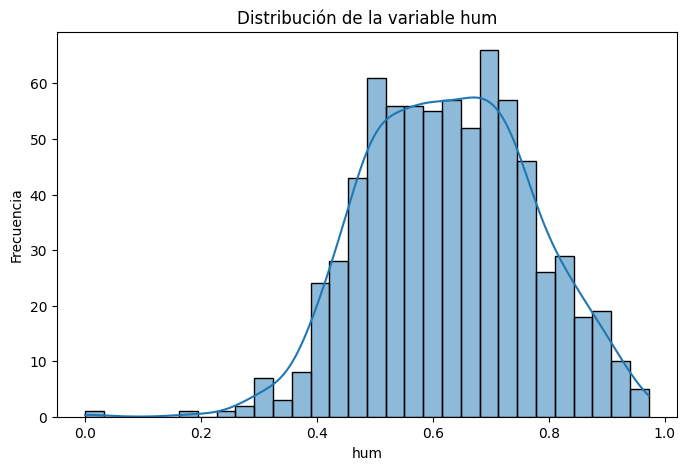

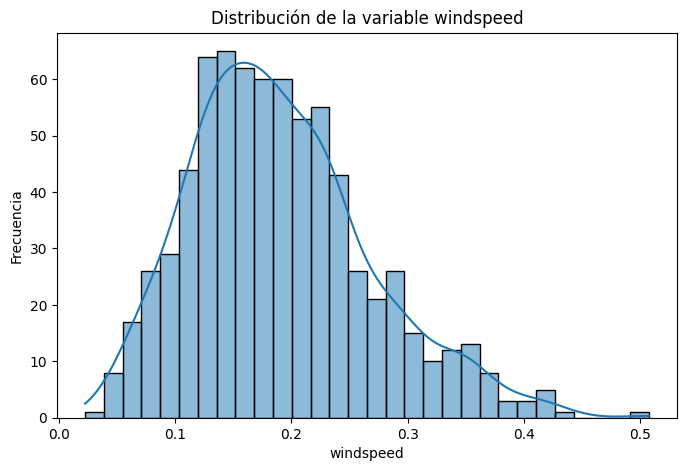

In [26]:
# Distribución de la variable respuesta 'cnt'
plt.figure(figsize=(8, 5))
sns.histplot(data['cnt'], kde=True, bins=30)
plt.title('Distribución de la variable respuesta "cnt"')
plt.xlabel('cnt')
plt.ylabel('Frecuencia')
plt.show()

# Distribuciones de otras variables
variables_interes = ['temp', 'hum', 'windspeed']
for var in variables_interes:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[var], kde=True, bins=30)
    plt.title(f'Distribución de la variable {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()


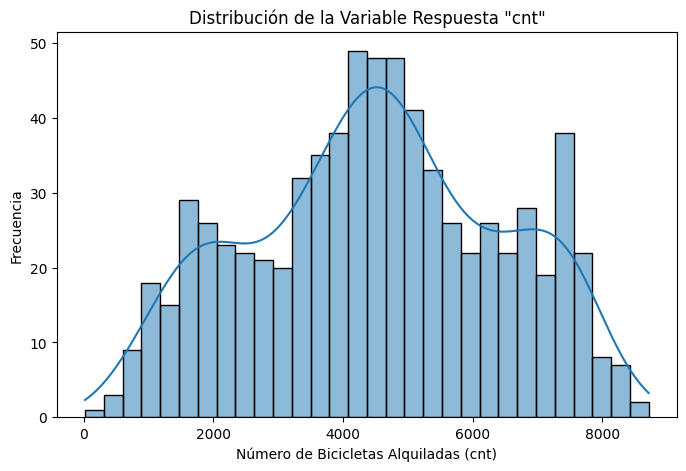

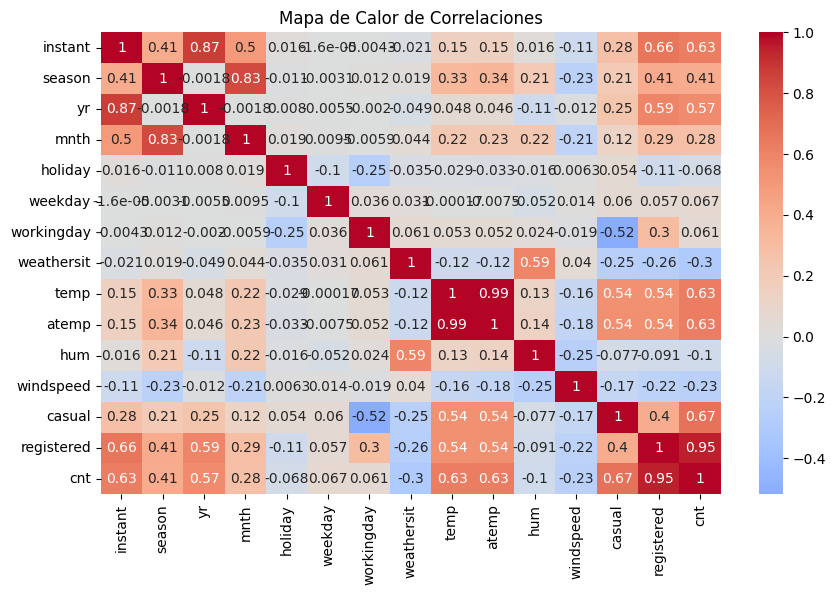

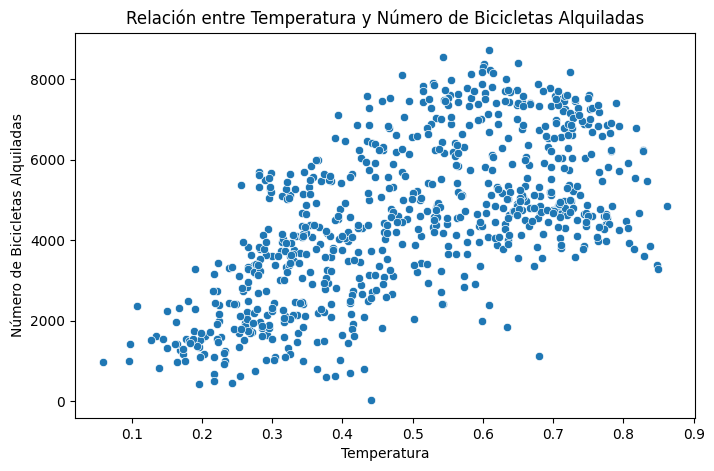

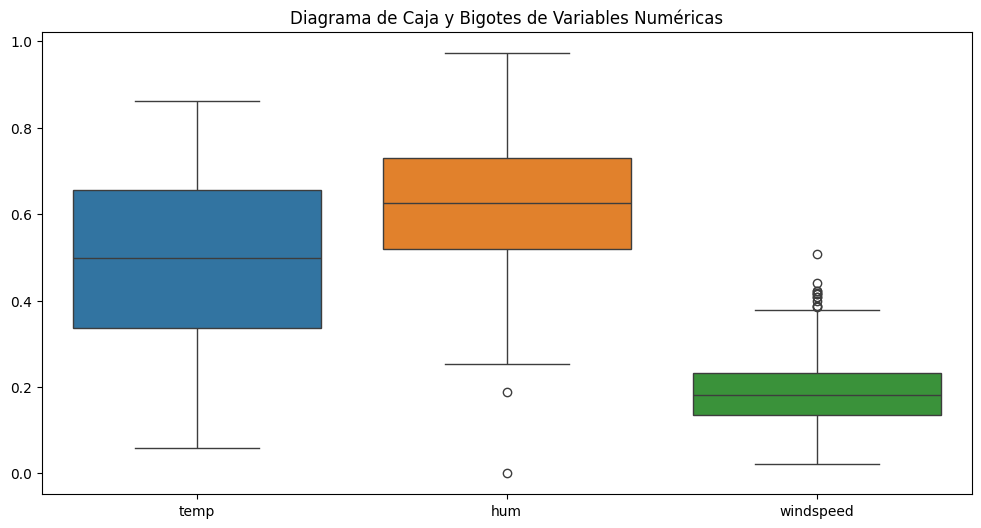

In [35]:
# Código para la distribución de la variable respuesta 'cnt'
plt.figure(figsize=(8, 5))
sns.histplot(data['cnt'], kde=True, bins=30)
plt.title('Distribución de la Variable Respuesta "cnt"')
plt.xlabel('Número de Bicicletas Alquiladas (cnt)')
plt.ylabel('Frecuencia')
plt.show()

# Mapa de Calor de Correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlaciones')
plt.show()


# Gráfico de Dispersión entre 'temp' y 'cnt'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='cnt', data=data)
plt.title('Relación entre Temperatura y Número de Bicicletas Alquiladas')
plt.xlabel('Temperatura')
plt.ylabel('Número de Bicicletas Alquiladas')
plt.show()


# Diagrama de Caja y Bigotes para variables numéricas
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['temp', 'hum', 'windspeed']])
plt.title('Diagrama de Caja y Bigotes de Variables Numéricas')
plt.show()


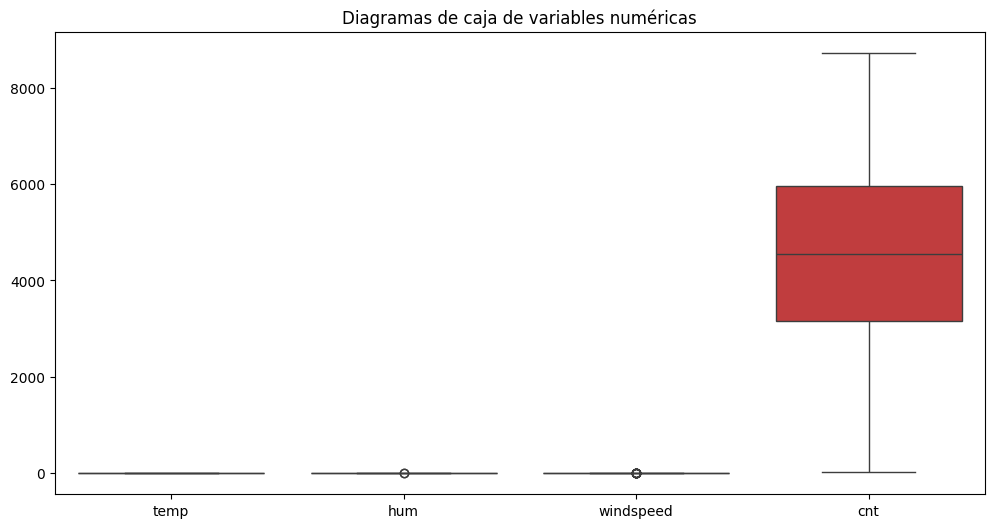

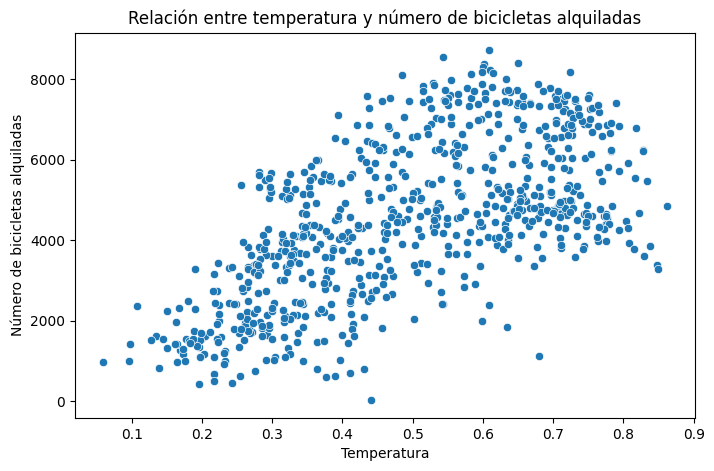

In [33]:
# Diagramas de caja para detectar outliers en variables continuas
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['temp', 'hum', 'windspeed', 'cnt']])
plt.title('Diagramas de caja de variables numéricas')
plt.show()

# Gráfico de dispersión entre 'temp' y 'cnt'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='cnt', data=data)
plt.title('Relación entre temperatura y número de bicicletas alquiladas')
plt.xlabel('Temperatura')
plt.ylabel('Número de bicicletas alquiladas')
plt.show()

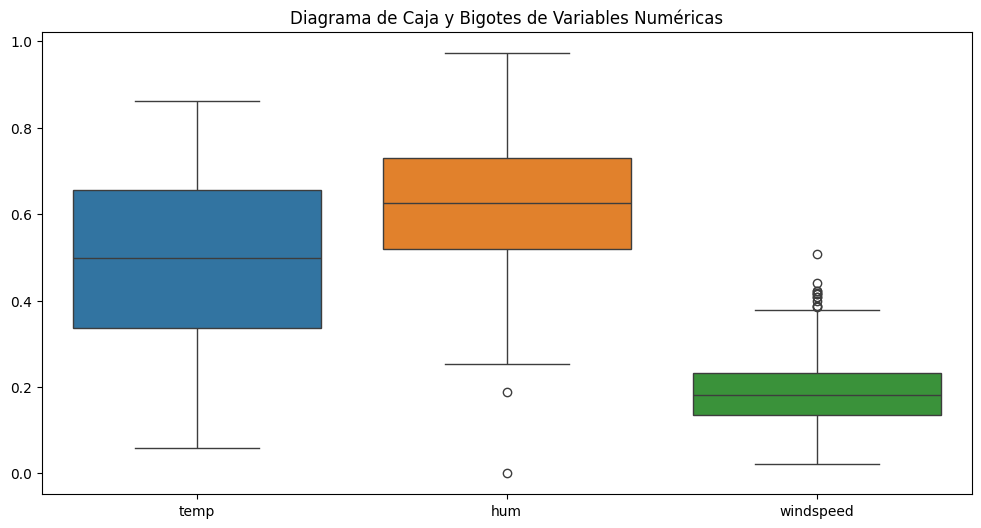

In [29]:
# Código para el Diagrama de Caja y Bigotes
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['temp', 'hum', 'windspeed']])
plt.title('Diagrama de Caja y Bigotes de Variables Numéricas')
plt.show()

# 6. Gráficos Adicionales
Para un análisis más profundo, usaremos gráficos de caja y bigotes para detectar posibles outliers y gráficos de dispersión para evaluar relaciones entre variables.

# 7. Comentarios e Interpretación de Resultados
**Análisis Descriptivo:**

- Variables Categóricas: Las distribuciones de variables como season, holiday, y weekday nos indican cómo se distribuyen los días de alquiler en función de estas categorías.
- Variables Continuas: Las estadísticas descriptivas nos muestran el rango, la media y otros estadísticos clave de las variables como temp, hum, windspeed, y cnt.
  
**Correlación:**

- El mapa de calor muestra que temp tiene una correlación positiva con cnt, lo que sugiere que a mayor temperatura, más bicicletas son alquiladas.
- hum y windspeed muestran correlaciones más débiles con cnt.
- 
**Distribución:**

- La distribución de cnt muestra una inclinación hacia un mayor número de alquileres en ciertos períodos, indicando una posible estacionalidad o patrones diarios.
- 
**Outliers:**

- Los diagramas de caja muestran posibles outliers en variables como temp y windspeed, lo cual puede ser relevante para la construcción y evaluación de modelos predictivos.
- 
**Relación de Variables:**

- El gráfico de dispersión entre temp y cnt refuerza la correlación positiva identificada, sugiriendo que la temperatura es un factor importante en el número de bicicletas alquiladas.
- 
**Resumen**
Este análisis proporciona una comprensión clara de los datos de Bike Sharing y establece una base sólida para construir modelos predictivos. Asegúrate de incluir las visualizaciones, análisis de correlación y gráficos adicionales en tu informe, comentando sobre las relaciones significativas y los patrones observados.